# Support vector machines with ScikitLearn

Lets use the popular Iris dataset.

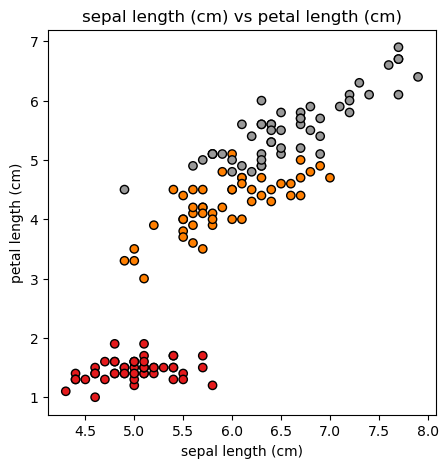

In [1]:
from sklearn.datasets import load_iris

# Cargar los datos de la base de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

import matplotlib.pyplot as plt

class_names = iris.target_names

# Create a scatter plot for selected features
i = 0
j = 2

plt.figure(figsize=(5, 5))
plt.scatter(X[:, i], X[:, j], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel(iris.feature_names[i])
plt.ylabel(iris.feature_names[j])
plt.title(f"{iris.feature_names[i]} vs {iris.feature_names[j]}")
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create the SVM classifier
clf = SVC(kernel='linear')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

It works better than the decision tree classifier!

Now, lets select two features in order to plot the results. I select the features where the classifier gets the highest accuracy.

In [3]:
selected_features = [0, 2]

X_train_2 = X_train[:, selected_features]
X_test_2 = X_test[:, selected_features]

# Create the SVM classifier
clf = SVC(kernel='linear')

# Train the classifier
clf.fit(X_train_2, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_2)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9555555555555556

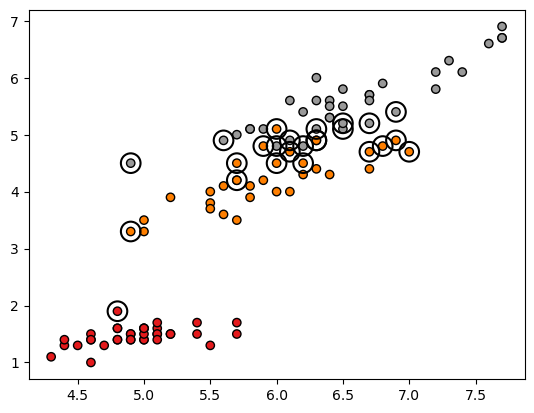

In [4]:
# Retrieve the support vectors and coefficients
support_vectors = clf.support_vectors_
coef = clf.coef_
intercept = clf.intercept_

# Plot the support vectors and the separation hyperplane
plt.scatter(X_train_2[:, 0], X_train_2[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none', edgecolors='k', linewidths=1.5, s=200)
plt.show()


And now lets plot the decision region for each class, according to the SVC

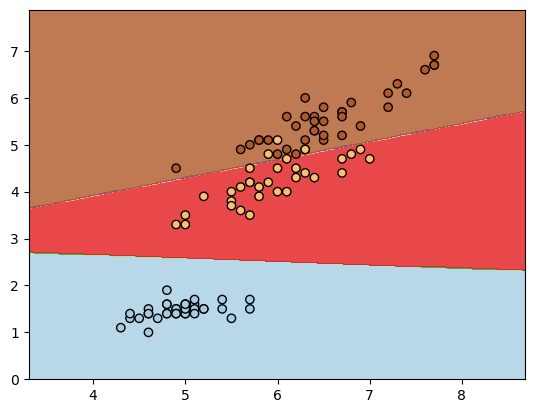

In [5]:
import numpy as np

def plot_classification_regions(X, y, clf):
    # Plot the separation hyperplane
    # Generate a grid of points that span the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Obtain the predicted labels for each point in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape the predicted labels into the grid shape
    Z = Z.reshape(xx.shape)

    # Plot the contour filled with the predicted labels
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

    # Plot the original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

    # Show the plot
    plt.show()

plot_classification_regions(X_train_2, y_train, clf)

### Type of kernel

In [6]:
# Create the SVM classifier
clf = SVC(kernel='rbf')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9777777777777777

In [7]:
# Create the SVM classifier
clf = SVC(kernel='poly')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9777777777777777

### The C parameter
C: This parameter controls the trade-off between achieving a low training error and a low-margin hyperplane.
- A smaller value of C creates a larger margin, potentially allowing more training errors but resulting in a simpler model. 
- In contrast, a larger value of C leads to a smaller margin and a more complex model that tries to classify all training examples correctly. The default value is C=1.0.

In [8]:
# Create the SVM classifier
clf = SVC(kernel='linear', C=20)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9777777777777777